In [46]:
# Permutation Palindrome
# Given a string can an input be permutated to return a palindrome

# EX. carerac = racecar = true

from collections import Counter

def is_palindrome(string):
    unique_letters = list(Counter(string).keys())
    num_odds = 0
    for i in unique_letters:
        if Counter(string)[i]%2 != 0:
            num_odds+=1
    return num_odds<=1
    
            

In [47]:
is_palindrome('raceecar')

True

In [52]:
# Is the left of the array equal to the right?

arr = [1, 7, 3, 5, 6]

def left_right_equal_sum(arr):
    i = 1
    while i < len(arr):
        sum_left = sum(arr[0:i+1])
        sum_right = sum(arr[i+1:])
        if sum_left == sum_right:
            ans = i
            break
        else:
            ans = -1

        i+=1
    return ans

In [53]:
left_right_equal_sum(arr)

2

In [1]:
# Merge sorted lists

list1 = [1,2,3,3,4,55]
list2 = [7,8,9,10,100]

def merge_sorted_list(list1,list2):
    return list1 + list2

In [2]:
merge_sorted_list(list1,list2)

[1, 2, 3, 3, 4, 55, 7, 8, 9, 10, 100]

Given a sorted list of positive integers with some entries being None, write a function to return a new list where all None values are replaced with the most recent non-None value in the list.

Note: If the first entry in the list is None, assume the previous entry was 0.

In [3]:
def fill_none(input_list):
    for i in range(0,len(input_list)):
        if input_list[i] == None and i != 0:
            input_list[i] = input_list[i-1]
        elif input_list[i] == None and i == 0:
            input_list[i] = 0
    return input_list

In [4]:
list1 = [1,None,2,3,4]
list2 = [None,5,6,7,8,None]

display(fill_none(list1))
display(fill_none(list2))

[1, 1, 2, 3, 4]

[0, 5, 6, 7, 8, 8]

You’re given numlists, a list where each element is a list of at least five numbers.

Write a function list_fifths that returns a list of the fifth-largest number from each element in numlists. Return the list in ascending order.

In [5]:
def list_fifths(numlists):
    return sorted([sorted(numlists[i])[-5] for i in range(0,len(numlists))])

In [6]:
numlists = [ [1,2,3,4,5], [3,1,2,5,4], [1,2,3,4,5,6,7], 
[99, 320, 400, 100.25, 55.2, 0.1] ]

list_fifths(numlists)

[1, 1, 3, 55.2]

## 11/16/2023

You’re given two dataframes. One contains information about addresses and the other contains relationships between various cities and states: 
Write a function complete_address to create a single dataframe with complete addresses in the format of street, city, state, zip code.



In [1]:
import pandas as pd

addresses = {"address": ["4860 Sunset Boulevard, San Francisco, 94105", "3055 Paradise Lane, Salt Lake City, 84103", "682 Main Street, Detroit, 48204", "9001 Cascade Road, Kansas City, 64102", "5853 Leon Street, Tampa, 33605"]}

cities = {"city": ["Salt Lake City", "Kansas City", "Detroit", "Tampa", "San Francisco"], "state": ["Utah", "Missouri", "Michigan", "Florida", "California"]}

df_addresses = pd.DataFrame(addresses)
df_cities = pd.DataFrame(cities)

In [2]:
# format the columns so they will join 
df_addresses['city'] = df_addresses['address'].str.split(',').str[1].str.lower().str.strip().str.title()
df_cities['city'] = df_cities['city'].str.lower().str.strip().str.title()

In [3]:
#convert to a single column
df = pd.merge(df_addresses,df_cities, left_on=['city'], right_on=['city'])
df = pd.DataFrame(df['address'].str.split(',',expand=True).iloc[:,0] + ',' + df['address'].str.split(',',expand=True).iloc[:,1] + ', ' + df['state'] + ',' + df['address'].str.split(',',expand=True).iloc[:,2],columns=['address'])
df

,address
0,"4860 Sunset Boulevard, San Francisco, Californ..."
1,"3055 Paradise Lane, Salt Lake City, Utah, 84103"
2,"682 Main Street, Detroit, Michigan, 48204"
3,"9001 Cascade Road, Kansas City, Missouri, 64102"
4,"5853 Leon Street, Tampa, Florida, 33605"


You are given a dataframe df_cheeses containing a list of the price of various cheeses from California The dataframe has missing values in the price column.
Write a function cheese_median to impute the median price of the selected California cheeses in place of the missing values. You may assume at least one cheese is not missing its price.

In [7]:
import pandas as pd

cheeses = {"Name": [
"Bohemian Goat", 
"Central Coast Bleu", 
"Cowgirl Mozzarella", 
"Cypress Grove Cheddar", 
"Oakdale Colby"], 
"Price" : [15.00, None, 30.00, None, 45.00]}

In [9]:
def cheese_median(dict):
    df = pd.DataFrame(dict)
    return df.fillna(df['Price'].median())

cheese_median(cheeses)

,Name,Price
0,Bohemian Goat,15.0
1,Central Coast Bleu,30.0
2,Cowgirl Mozzarella,30.0
3,Cypress Grove Cheddar,30.0
4,Oakdale Colby,45.0


Let’s say we are given a table user_logins.

Using this table, calculate how many users logged in an identical number of times on January 1st, 2022.

For example, it may be the case that on that date three users logged in seven times, four users logged in five times, two users logged in ten times, etc.

In [1]:
import pandas as pd

def daily_login(user_logins: pd.DataFrame):
    new_year = pd.to_datetime('2022-01-01').date()
	
    # get dates from jan 1st 2022 
    user_logins['login_date'] = pd.to_datetime(user_logins['login_date']).dt.date
    user_logins = user_logins[user_logins['login_date'] == new_year]
    
    # count number of times logged in
    user_logins['number_of_logins'] = user_logins.groupby('user_id')['login_date'].transform('count')
    user_logins = user_logins.drop('id',axis=1).drop_duplicates()
    
    # count number of users where logged in number of times was same
    user_logins['number_of_users'] = user_logins.groupby(['number_of_logins'])['user_id'].transform('count')
    return user_logins[['number_of_logins','number_of_users']].drop_duplicates()

In [2]:
data = {
    'id': [1, 2, 3, 4, 5, 6, 7, 8, 9],
    'user_id': [1, 2, 3, 1, 2, 3, 1, 2, 3],
    'login_date': ['2022-01-01', '2022-01-01', '2022-01-01', '2022-01-01', '2022-01-01', '2022-01-01', '2022-01-01', '2022-01-01', '2022-01-01']
}
data = pd.DataFrame(data)
daily_login(data)

,number_of_logins,number_of_users
0,3,3


## Player Analysis

You’ve been asked to analyze the player’s behaviors at a gaming company.

Write a query to get the number of players who played between 5 and 10 games (5 and 10 excluded), and the number of players who played 10 games or more.

In [4]:

import pandas as pd
import numpy as np
from datetime import datetime, timedelta

# Create a sample players DataFrame
np.random.seed(42)  # Set seed for reproducibility

# Generate random data for player_id, name, games_played, and registered_at
num_players = 100
player_ids = np.arange(1, num_players + 1)
names = ['Player_' + str(i) for i in player_ids]
games_played = np.random.randint(1, 20, size=num_players)
registered_at = [datetime(2022, 1, 1) + timedelta(days=np.random.randint(1, 365)) for _ in range(num_players)]

players_data = {
    'id': player_ids,
    'name': names,
    'games_played': games_played,
    'registered_at': registered_at
}

players = pd.DataFrame(players_data)

# Display the DataFrame
players

,id,name,games_played,registered_at
0,1,Player_1,7,2022-08-03
1,2,Player_2,15,2022-02-05
2,3,Player_3,11,2022-08-16
3,4,Player_4,8,2022-04-12
4,5,Player_5,7,2022-05-12
...,...,...,...,...
95,96,Player_96,16,2022-08-07
96,97,Player_97,5,2022-06-10
97,98,Player_98,3,2022-07-18
98,99,Player_99,12,2022-09-05


In [5]:
def player_behaviors(players: pd.DataFrame):
    # get number of players between (5-10)
    players['players_more_than_5_to_10_games'] = (players['games_played'] > 5) & (players['games_played'] < 10)
    # get number of players that played 10+ games 
    players['players_10_plus_games'] = players['games_played'] >= 10
    five_to_10_cnt =  players['players_more_than_5_to_10_games'].sum()
    ten_plus_cnt = players['players_10_plus_games'].sum()
    return pd.DataFrame({'players_more_than_5_to_10_games': [five_to_10_cnt] ,'players_10_plus_games':[ten_plus_cnt]})

player_behaviors(players)

,players_more_than_5_to_10_games,players_10_plus_games
0,26,48


## Repeated Category Purchase

You’re analyzing a user’s purchases for a retail business.

Each product belongs to a category. Your task is to identify which purchases represent the first time the user has bought a product from its own category and which purchases represent repeat purchases within the product category.

The id in the purchases table represents the purchase order (rows with a lower id are earlier purchases).

Your code should output a table that includes every purchase the user has made. Additionally, the table should include a boolean column with a value of 1 if the user has previously purchased a product from its category and 0 if it’s their first time buying a product from that category.

Note: Sort the results by the time purchased, in ascending order.

In [6]:
# Given data
data = {
    'id': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'product_name': ["toy car", "basketball", "toy car", "basketball", "baseball", "robot X1", "robot X2", "toy plane", "robot X3", "teddy bear"],
    'product_category': [1, 2, 1, 2, 2, 3, 3, 1, 3, 5]
}

# Create DataFrame
df = pd.DataFrame(data)

In [7]:
def purchased_product(purchases: pd.DataFrame):
    # determine if purchased before
    purchases['category_previously_purchased'] = purchases.sort_values('id').groupby('product_category').cumcount()
    purchases.loc[purchases['category_previously_purchased'] > 1, 'category_previously_purchased'] = 1
    return purchases[['product_name','category_previously_purchased']] 

purchased_product(df)

,product_name,category_previously_purchased
0,toy car,0
1,basketball,0
2,toy car,1
3,basketball,1
4,baseball,1
5,robot X1,0
6,robot X2,1
7,toy plane,1
8,robot X3,1
9,teddy bear,0


## 11/22/2023

Let’s say that we work for a B2B SaaS company that has been around for three years.

The company has two revenue lines (product_type): the first is labeled as "service" and is a consulting type model where clients are serviced on an hourly rate for a one-off project. The second revenue line is "software", which clients can purchase on an ongoing subscription basis.

Given a table of payments data, write a query to calculate the average revenue per client.

Note: Round the result to two decimals.

In [8]:
data = {
    'id': [1, 2, 3, 4, 5],
    'user_id': [101, 102, 101, 103, 102],
    'created_at': ['2022-01-01', '2022-01-02', '2022-02-01', '2022-02-15', '2022-03-01'],
    'amount_per_unit': [100.00, 50.00, 200.00, 150.00, 30.00],
    'quantity': [2, 1, 3, 2, 5],
    'product_type': ['service', 'software', 'service', 'software', 'service']
}

payments_df = pd.DataFrame(data)

In [10]:
import pandas as pd

def average_revenue_per_customer(payments: pd.DataFrame):
    # calc revenue per payment
    payments['revenue'] = payments['quantity'] * payments['amount_per_unit']
    # calc total revenue per customer
    payments['total_client_revenue'] = payments.groupby('user_id')['revenue'].transform('sum')
    # drop duplicates
    payments = payments[['user_id','total_client_revenue']].drop_duplicates()  
    # calc the average client revenue
    payments['average_lifetime_revenue'] = payments['total_client_revenue'].mean().round(2)
    
    return payments[['average_lifetime_revenue']].drop_duplicates()

average_revenue_per_customer(payments_df)

,average_lifetime_revenue
0,433.33


We’re given two tables. friend_requests holds all the friend requests made and friend_accepts is all of the acceptances.

Write a query to find the overall acceptance rate of friend requests.

Note: Round results to 4 decimal places.

In [16]:
# Create friend_requests DataFrame
friend_requests_data = {
    'requester_id': [1, 2, 3, 4, 5],
    'requested_id': [6, 7, 8, 9, 10],
    'request_date': ['2022-01-01', '2022-01-02', '2022-01-03', '2022-01-04', '2022-01-05'],
    'accepted': [1, 0, 1, 1, 0]  # 1 for accepted, 0 for not accepted
}

friend_requests_df = pd.DataFrame(friend_requests_data)

# Create friend_accepts DataFrame
friend_accepts_data = {
    'requester_id': [2, 4, 5],
    'acceptor_id': [7, 9, 10],
    'accept_date': ['2022-01-02', '2022-01-04', '2022-01-06']
}

friend_accepts_df = pd.DataFrame(friend_accepts_data)

In [17]:
def acceptance_rate(friend_accepts: pd.DataFrame, friend_requests: pd.DataFrame):
    # left join tables (will be at request level)
    df = pd.merge(friend_requests,friend_accepts,left_on=['requested_id','requester_id'],right_on=['acceptor_id','requester_id'],how='left')
    # count number of not null acceptor_ids vs total
    total = len(df['acceptor_id'])
    accepted = len(df['acceptor_id'].dropna())
    data = {'acceptance_rate':[round(accepted/total,4)]}
    return pd.DataFrame(data)

acceptance_rate(friend_accepts_df,friend_requests_df)

,acceptance_rate
0,0.6


The events table tracks every time a user performs a certain action (like, post_enter, etc.) on a platform.

Write a query to determine the top 5 actions performed during the week of Thanksgiving (11/22/2020 - 11/28/2020), and rank them based on number of times performed.

The output should include the action performed and their rank in ascending order. If two actions were performed equally, they should have the same rank. 

In [20]:
# Create events DataFrame
events_data = {
    'user_id': [1, 2, 3, 1, 2, 3, 1, 2, 3],
    'created_at': [
        '2020-11-23 08:00:00', '2020-11-23 09:30:00', '2020-11-23 10:45:00',
        '2020-11-25 12:15:00', '2020-11-25 14:00:00', '2020-11-26 08:30:00',
        '2020-11-27 13:45:00', '2020-11-27 15:20:00', '2020-11-28 11:00:00'
    ],
    'action': ['like', 'post_enter', 'comment', 'like', 'comment', 'like', 'comment', 'post_enter', 'like'],
    'platform': ['iOS', 'Android', 'iOS', 'iOS', 'Android', 'iOS', 'Android', 'iOS', 'Android']
}

events_df = pd.DataFrame(events_data)

In [21]:
import pandas as pd

def popular_actions(events: pd.DataFrame):
    
    # filter data from 11/22/2020 - 11/28/2020
    min_date = pd.to_datetime('11/22/2020')
    max_date = pd.to_datetime('11/28/2020')
    events['created_at'] = pd.to_datetime(events['created_at'])
    events = events[(events['created_at'] >= min_date) & (events['created_at'] <= max_date)]
    
    # groupyby actions and count
    events['ranks'] = events.groupby('action')['user_id'].transform('count')
    
    # order action counts in asc and add rank
    events = events[['action','ranks']].drop_duplicates().sort_values('ranks',ascending=False) 
    events['ranks'] = events.reset_index().index + 1
    
    return events.head(5)
popular_actions(events_df)

C:\Users\Aaron\AppData\Local\Temp\ipykernel_23676\3760861760.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  events['ranks'] = events.groupby('action')['user_id'].transform('count')


,action,ranks
0,like,1
2,comment,2
1,post_enter,3


In [22]:
data = {
    'id': [1, 2, 3, 4, 5],
    'issue': ['Network Issue', 'Software Bug', 'Login Problem', 'Hardware Failure', 'Billing Inquiry'],
    'agent_id': [101, None, 102, None, 103],
    'created_at': ['2022-01-01 10:00:00', '2022-01-02 11:15:00', '2022-01-03 14:30:00', '2022-01-04 08:45:00', '2022-01-05 09:00:00'],
    'updated_at': ['2022-01-01 12:30:00', '2022-01-03 14:45:00', '2022-01-04 09:20:00', '2022-01-05 11:10:00', '2022-01-06 13:45:00']
}

tickets_df = pd.DataFrame(data)

In [23]:
def tickets_analysis(tickets: pd.DataFrame):
    # calc total ticks
    total_cnt = len(tickets['agent_id'])

    # calc total ticks assigned to agent
    total_assigned = len(tickets['agent_id'].dropna())

    # calc total unassigned tickets
    total_unassigned = total_cnt - total_assigned

    data = {'total_tickets':[total_cnt],'tickets_with_agent':[total_assigned],'tickets_without_agent':[total_unassigned]}
    return pd.DataFrame(data)
tickets_analysis(tickets_df)

,total_tickets,tickets_with_agent,tickets_without_agent
0,5,3,2


## 11/23/23

Given three tables, representing customer transactions and customer attributes:

Write a query to get the average order value by gender.

Note: We’re looking at the average order value by users that have ever placed an order. Additionally, please round your answer to two decimal places.

In [24]:
# Sample data for transactions table
transactions_data = {
    'id': [1, 2, 3, 4, 5],
    'user_id': [1, 2, 1, 3, 2],
    'created_at': ['2023-01-01', '2023-01-02', '2023-01-03', '2023-01-04', '2023-01-05'],
    'product_id': [101, 102, 103, 104, 105],
    'quantity': [2, 1, 3, 2, 1]
}

# Sample data for users table
users_data = {
    'id': [1, 2, 3],
    'name': ['Alice', 'Bob', 'Charlie'],
    'sex': ['Female', 'Male', 'Male']
}

# Sample data for products table
products_data = {
    'id': [101, 102, 103, 104, 105],
    'name': ['Product1', 'Product2', 'Product3', 'Product4', 'Product5'],
    'price': [10.0, 20.0, 15.0, 25.0, 30.0]
}

# Creating DataFrames
transactions_df = pd.DataFrame(transactions_data)
users_df = pd.DataFrame(users_data)
products_df = pd.DataFrame(products_data)


In [26]:
def average_order_value(products: pd.DataFrame, transactions: pd.DataFrame, users: pd.DataFrame):
    # join the three tables where order was purchased
    df = pd.merge(transactions,users,left_on='user_id',right_on='id',how='inner')[['product_id','sex','quantity']]
    df = pd.merge(df,products,left_on='product_id',right_on='id',how='inner')[['sex','price','quantity']]
    df['price'] = df['price'] * df['quantity']
    
    # find average order value by  and round three decimal places
    df['aov'] = df.groupby('sex')['price'].transform('mean').round(2)

    return df[['aov','sex']].drop_duplicates() 

average_order_value(products_df,transactions_df,users_df)

,aov,sex
0,32.50,Female
2,33.33,Male


We’re given two tables. One is named projects and the other maps employees to the projects they’re working on. 

We want to select the five most expensive projects by budget to employee count ratio. But let’s say that we’ve found a bug where there exist duplicate rows in the employee_projects table.

Write a query to account for the error and select the top five most expensive projects by budget to employee count ratio.

In [27]:
# Sample data for projects table
projects_data = {
    'id': [1, 2, 3, 4, 5, 6],
    'title': ['Project A', 'Project B', 'Project C', 'Project D', 'Project E', 'Project F'],
    'start_date': ['2023-01-01', '2023-02-01', '2023-03-01', '2023-04-01', '2023-05-01', '2023-06-01'],
    'end_date': ['2023-06-30', '2023-07-31', '2023-08-31', '2023-09-30', '2023-10-31', '2023-12-31'],
    'budget': [100000, 150000, 120000, 200000, 180000, 250000]
}

# Sample data for employee_projects table with duplicates
employee_projects_data = {
    'project_id': [1, 2, 3, 4, 5, 1, 2, 3, 4, 5],
    'employee_id': [101, 102, 103, 104, 105, 101, 102, 103, 104, 105]
}

# Creating DataFrames
projects_df = pd.DataFrame(projects_data)
employee_projects_df = pd.DataFrame(employee_projects_data)

In [28]:
def project_budget_error(employee_projects: pd.DataFrame, projects: pd.DataFrame):
    # drop duplicates from employee projects
    employee_projects = employee_projects.drop_duplicates()
    
    # join tables 
    df = pd.merge(employee_projects,projects,left_on='project_id',right_on='id')

    # get employee count per project, reduce table to project level
    df['employee_cnt'] = df.groupby('project_id')['employee_id'].transform('count')
    df = df[['title','project_id','employee_cnt','budget']].drop_duplicates()

    # get project budget/count per project 
    df['budget_per_employee'] = df['budget'] / df['employee_cnt']

    # get top 5. sort order?
    return df[['title','budget_per_employee']].sort_values('budget_per_employee',ascending=False).head(5)


project_budget_error(employee_projects_df,projects_df)

,title,budget_per_employee
3,Project D,200000.0
4,Project E,180000.0
1,Project B,150000.0
2,Project C,120000.0
0,Project A,100000.0


## 11/24/2023

return the input dataframes and only the input dataframes for this problem. Write a query to identify the names of users who placed less than 3 orders or ordered less than $500 worth of product.

In [29]:
import pandas as pd

# Sample data for transactions table
transactions_data = {
    'id': [1, 2, 3, 4, 5],
    'user_id': [1, 2, 1, 3, 2],
    'created_at': ['2023-01-01', '2023-01-02', '2023-01-03', '2023-01-04', '2023-01-05'],
    'product_id': [101, 102, 103, 104, 105],
    'quantity': [2, 1, 3, 2, 1]
}

# Sample data for users table
users_data = {
    'id': [1, 2, 3],
    'name': ['Alice', 'Bob', 'Charlie'],
    'sex': ['Female', 'Male', 'Male']
}

# Sample data for products table
products_data = {
    'id': [101, 102, 103, 104, 105],
    'name': ['Product1', 'Product2', 'Product3', 'Product4', 'Product5'],
    'price': [10.0, 20.0, 15.0, 25.0, 30.0]
}

# Creating DataFrames
transactions_df = pd.DataFrame(transactions_data)
users_df = pd.DataFrame(users_data)
products_df = pd.DataFrame(products_data)


In [30]:
import pandas as pd

def fewer_orders(products: pd.DataFrame, transactions: pd.DataFrame, users: pd.DataFrame):
    # join tables, users + transactions
    user_transaction = pd.merge(users,transactions,left_on='id',right_on='user_id',how='left',suffixes=('_user',''))[['name','product_id','quantity','id']]

    # join user_transaction to products table
    df = pd.merge(user_transaction,products,left_on='product_id',right_on='id',how='left',suffixes=('','_'))[['name','id','price','quantity']]

    # fill nulls with 0
    df['price'],df['quantity'] = df['price'].fillna(0), df['quantity'].fillna(0)

    # count orders
    df['order_cnt'] = df.groupby('name')['id'].transform('count')
    df.loc[df['quantity'] == 0,'order_cnt'] = 0

    # total order values
    df['total_order_price'] = df['quantity'] * df['price']
    df['total_order_price_per_customer'] = df.groupby('name')['total_order_price'].transform('sum') 

    # filter criteria
    df = df[(df['total_order_price_per_customer'] < 500) | (df['order_cnt'] < 3)][['name']].drop_duplicates()
    df = df.rename(columns={'name':'users_less_than'}) 

    return df

fewer_orders(products_df,transactions_df,users_df)

,users_less_than
0,Alice
2,Bob
4,Charlie


## 12/1/2023

Let’s say you work at an advertising firm. You have a table of users’ impressions of ad campaigns over time. Each impression_id consists of values of user engagement specified by Excited, OK, and Bored.

Write a query to find all users that are currently “Excited” and have never been “Bored” with a campaign.

In [1]:
import pandas as pd

# Sample DataFrame for ad_impressions
data = {'user_id': [1, 1, 2, 2, 3, 3, 4, 4],
        'dt': ['2023-01-01', '2023-02-01', '2023-01-15', '2023-02-20', '2023-03-01', '2023-03-15', '2023-04-01', '2023-04-10'],
        'campaign_id': [1, 1, 2, 2, 3, 3, 4, 4],
        'impression_id': ['Excited', 'OK', 'Excited', 'OK', 'Excited', 'Excited', 'OK', 'Excited']}

ad_impressions_df = pd.DataFrame(data)
ad_impressions_df['dt'] = pd.to_datetime(ad_impressions_df['dt'])

In [3]:
import pandas as pd

def always_excited_users(ad_impressions: pd.DataFrame):
    
    ad_impressions['dt'] = pd.to_datetime(ad_impressions['dt'])

    # Filter users who are currently "Excited" 
    curr_excited = ad_impressions[ad_impressions['impression_id'] == 'Excited']['user_id']

    # Users that have never been bored
    never_bored = ad_impressions.groupby('user_id').filter(lambda group: 'Bored' not in group['impression_id'].values)['user_id']

    return pd.DataFrame({'user_id':list(set(never_bored).intersection(curr_excited))})
    
always_excited_users(ad_impressions_df)

,user_id
0,1
1,2
2,3
3,4


## 12/10/23

Given a string, find the first non-repeating character in it and return its index. If it doesn’t exist, return -1.

Example questions:

Consider a string where all characters are lowercase alphabets.

In [1]:
str1 = 'banana'
str2 = 'alphabet'
str3 = 'mini'

In [2]:
def first_uniq_char(s):
    for letter in s:
        if s.count(letter) == 1:
            return s.find(letter)
    return -1

display(
first_uniq_char(str1),
first_uniq_char(str2),
first_uniq_char(str3)
)

0

1

0

## 12/17/23

Write a function to determine the mode of an array of integers.

The list may have one mode, more than one mode, or no mode at all. If the list has multiple modes, return them in ascending order.

In [7]:
def mode (nums : list):
    # create mode dict
    mode_dict = {}

    # add nums to dictionary and increment num of occurences
    for i in range(len(nums)):
        if nums[i] in mode_dict.keys():
            mode_dict[nums[i]] = mode_dict[nums[i]] + 1
        else:
            mode_dict[nums[i]] = 1 

    # find the most frequent
    max_value = max(mode_dict.values())
    mode_arr = [key for key in mode_dict.keys() if mode_dict[key] == max_value]

    return mode_arr

In [8]:
mode([1,2,3,3,3,4,4,4,5])

{1: 1, 2: 1, 3: 1}
{1: 1, 2: 1, 3: 2}
{1: 1, 2: 1, 3: 3, 4: 1}
{1: 1, 2: 1, 3: 3, 4: 2}


[3, 4]

## 12/23/2023 - Normal Distribution

<Axes: ylabel='Count'>

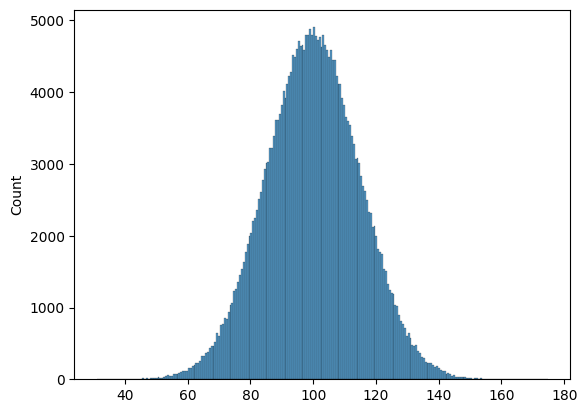

In [9]:
import numpy as np 
import pandas as pd
import seaborn as sns

mu,sigma = 100,15
sns.histplot(pd.Series(np.random.normal(mu,sigma,300000)))